In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score , mean_squared_error ,accuracy_score
import re
import pickle as pk

In [2]:
df = pd.read_csv('housePrice.csv')

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


In [295]:
df.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


In [296]:
df.isnull().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [297]:
df.dropna(inplace=True)

In [298]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [37]:
df['Address'].value_counts()['Punak']

161

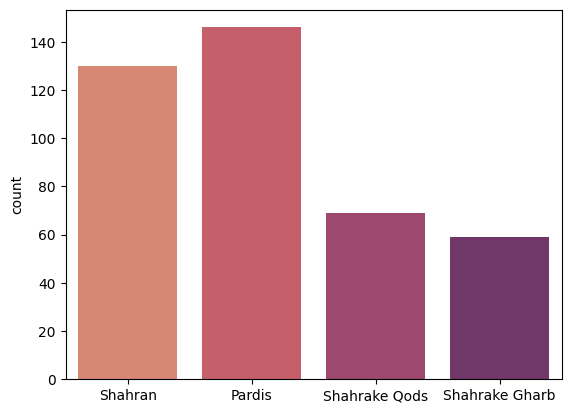

In [66]:
sns.barplot(x=df['Address'].unique()[:4],y=df['Address'].value_counts()[df['Address'].unique()[:4]],palette='flare',hue=df['Address'].unique()[:4])
plt.show()

C:\Users\Elcom\AppData\Local\Temp\ipykernel_4064\3817004983.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Parking'].unique(),y=df['Parking'].value_counts(),palette='flare')


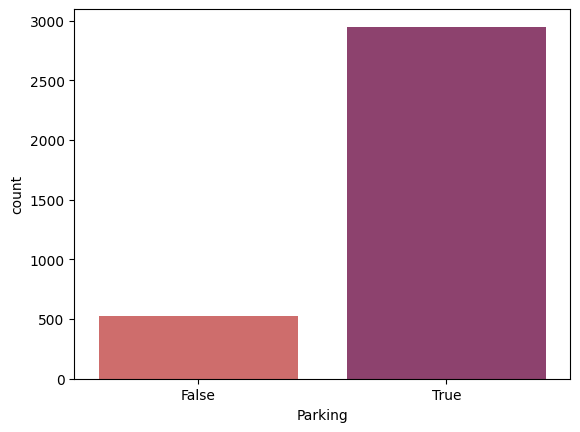

In [63]:
sns.barplot(x=df['Parking'].unique(),y=df['Parking'].value_counts(),palette='flare')
plt.xlabel('Parking')
plt.show()

C:\Users\Elcom\AppData\Local\Temp\ipykernel_4064\3188103244.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Warehouse'].unique(),y=df['Warehouse'].value_counts(),palette='flare')


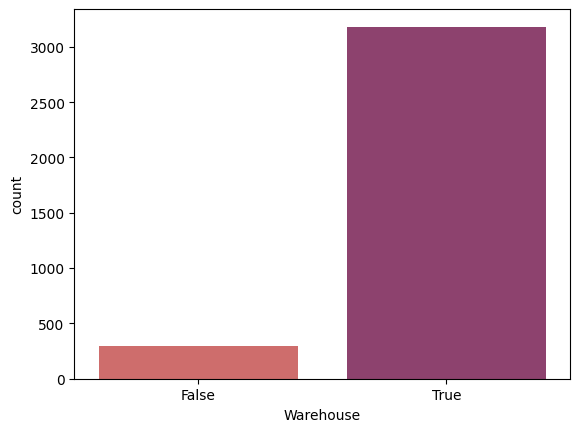

In [67]:
sns.barplot(x=df['Warehouse'].unique(),y=df['Warehouse'].value_counts(),palette='flare')
plt.xlabel('Warehouse')
plt.show()

C:\Users\Elcom\AppData\Local\Temp\ipykernel_4064\2692127899.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Room'].unique(),y=df['Room'].value_counts(),palette='flare')


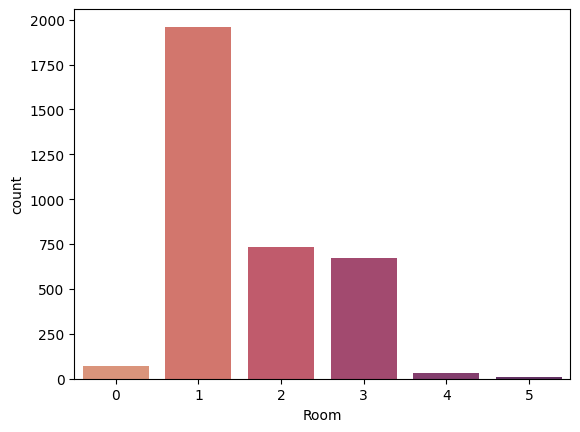

In [68]:
sns.barplot(x=df['Room'].unique(),y=df['Room'].value_counts(),palette='flare')
plt.xlabel('Room')
plt.show()

C:\Users\Elcom\AppData\Local\Temp\ipykernel_4064\1987303540.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(x=df['Room'],y=df['Price'],palette='flare',ci=0)
C:\Users\Elcom\AppData\Local\Temp\ipykernel_4064\1987303540.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Room'],y=df['Price'],palette='flare',ci=0)


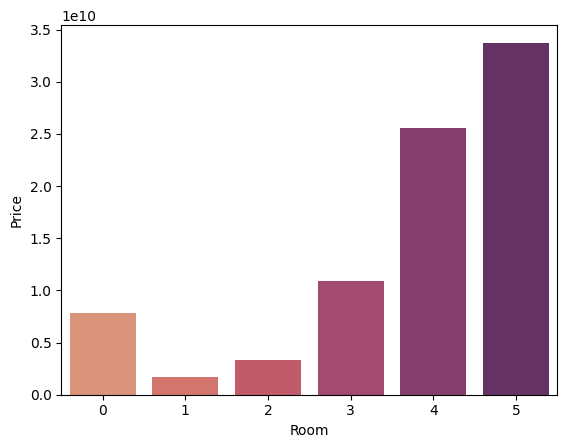

In [76]:
sns.barplot(x=df['Room'],y=df['Price'],palette='flare',ci=0)
plt.xlabel('Room')
plt.show()

In [299]:
df.drop('Price(USD)',axis=1,inplace=True)

In [300]:
df['Elevator'] = df['Elevator'].apply(lambda x:1 if x == True else 0)
df['Parking'] = df['Parking'].apply(lambda x:1 if x == True else 0)
df['Warehouse'] = df['Warehouse'].apply(lambda x:1 if x == True else 0)

In [301]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,1,1,1,Shahran,1.850000e+09
1,60,1,1,1,1,Shahran,1.850000e+09
2,79,2,1,1,1,Pardis,5.500000e+08
3,95,2,1,1,1,Shahrake Qods,9.025000e+08
4,123,2,1,1,1,Shahrake Gharb,7.000000e+09


In [302]:
df['Area'] = df['Area'].apply(lambda x: re.sub(',','',x))

In [303]:
address_dummy = pd.get_dummies(df['Address'])
df = df.merge(address_dummy,left_index=True,right_index=True)
df.drop('Address',axis=1,inplace=True)

In [304]:
df.sample(5)

,Area,Room,Parking,Warehouse,Elevator,Price,Abazar,Abbasabad,Absard,Abuzar,...,Waterfall,West Ferdows Boulevard,West Pars,Yaftabad,Yakhchiabad,Yousef Abad,Zafar,Zaferanieh,Zargandeh,Zibadasht
3218,62,2,0,1,0,2.300000e+09,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2266,150,2,1,1,1,1.500000e+10,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
130,44,1,1,1,0,1.050000e+09,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2965,50,1,1,1,1,1.500000e+09,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2717,100,2,1,1,1,3.800000e+09,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3456 entries, 0 to 3478
Columns: 198 entries, Area to Zibadasht
dtypes: bool(192), float64(1), int64(4), object(1)
memory usage: 966.0+ KB


In [306]:
X = df.drop('Price',axis=1)
y = df['Price']

In [373]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.20,random_state=39)

In [374]:
RF = RandomForestRegressor()
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)
acc_test = RF.score(X_test,y_test)
acc_train = RF.score(X_train,y_train)
print(f'Accuracy Test: {acc_test}')
print(f'Accuracy Train: {acc_train}')

Accuracy Test: 0.8113270289506975
Accuracy Train: 0.948933573680666


In [378]:
with open('model.pkl','wb') as file:
    pk.dump(RF,file)